Binary classification with Kaggle dataset - Airline Passenger Satisfaction https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# EDA

Importing dataset as pandas DataFrame

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/neural_networks_fiit/Project_1/data/train.csv")

## Dataset Overview
Let's get a quick summary of the dataset to understand its size, structure, and contents.

Shape of DataFrame

In [5]:
df.shape

(103904, 25)

First and last five rows of DataFrame

In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Checking summary statistics for dataset

In [9]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Number of unique values for every atribute

In [11]:
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

Checking for null values

In [12]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

## Visualizing Features¶

(array([0, 1]),
 [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

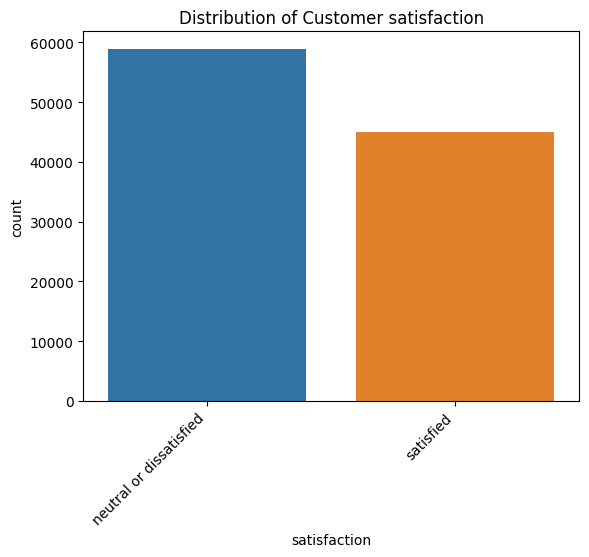

In [13]:
satisfaction_counts = df['satisfaction'].value_counts()

sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts)

plt.title('Distribution of Customer satisfaction')
plt.xticks(rotation=45, ha='right')

(array([0, 1]),
 [Text(0, 0, 'Loyal Customer'), Text(1, 0, 'disloyal Customer')])

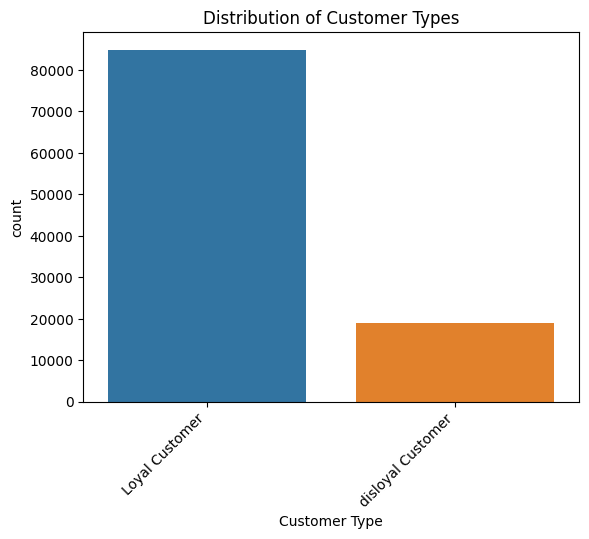

In [14]:
customer_type_counts = df['Customer Type'].value_counts()

sns.barplot(x=customer_type_counts.index, y=customer_type_counts)

plt.title('Distribution of Customer Types')
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='Age', ylabel='satisfaction'>

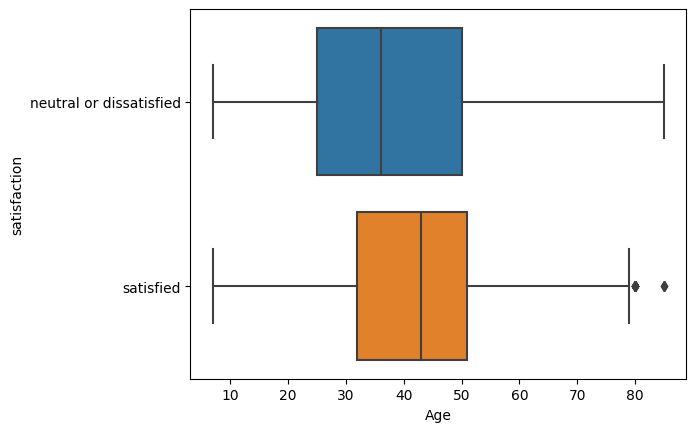

In [15]:
sns.boxplot( x="Age", y='satisfaction', data=df)

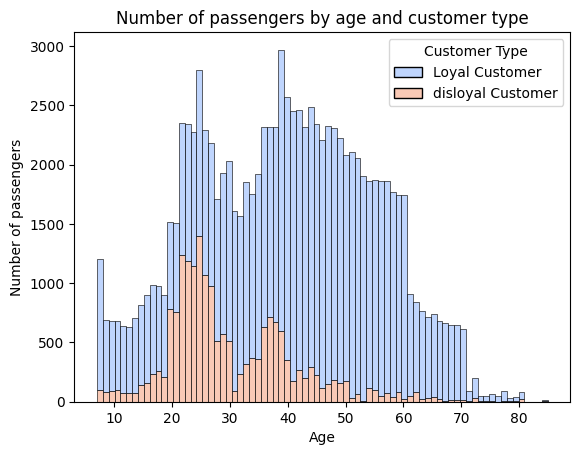

In [16]:
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "coolwarm", edgecolor = "black")
plt.title('Number of passengers by age and customer type')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

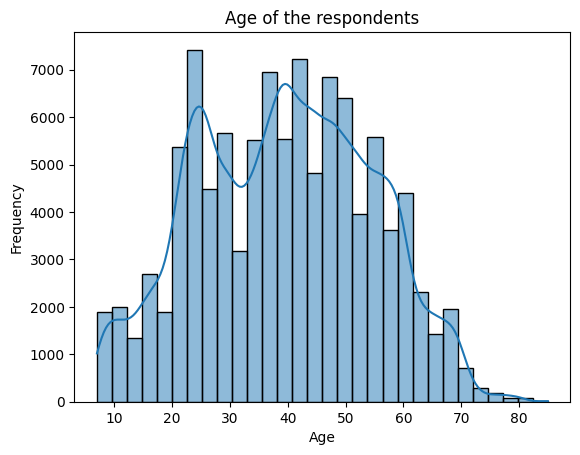

In [17]:
sns.histplot(df['Age'], bins=30, kde=True,  palette = "coolwarm", edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of the respondents')
plt.show()

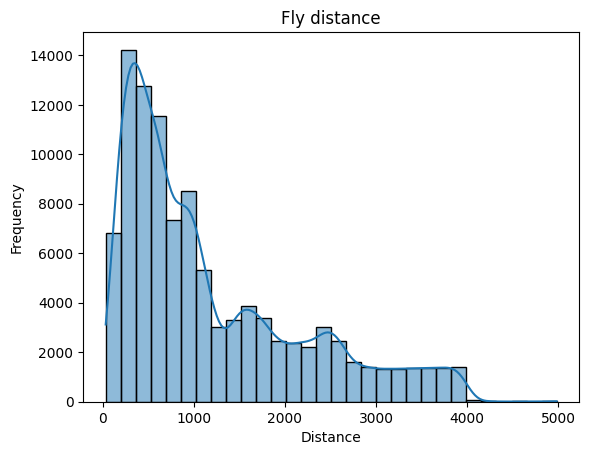

In [18]:
sns.histplot(df['Flight Distance'], bins=30, kde=True, palette = "coolwarm", edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Fly distance')
plt.show()

Text(0.5, 1.0, 'Fly distance')

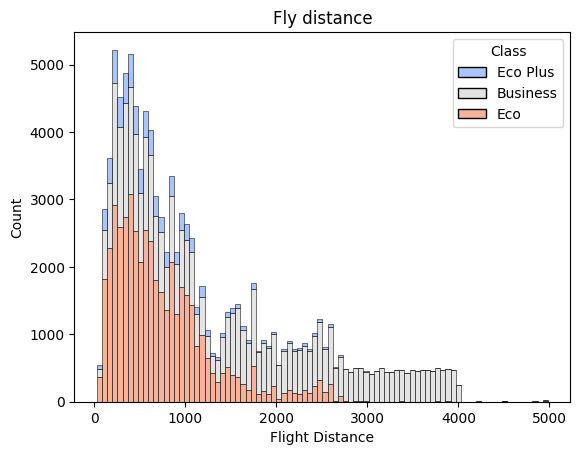

In [19]:
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "coolwarm", edgecolor = "black")
plt.title('Fly distance')

Correlation matrix

<Axes: >

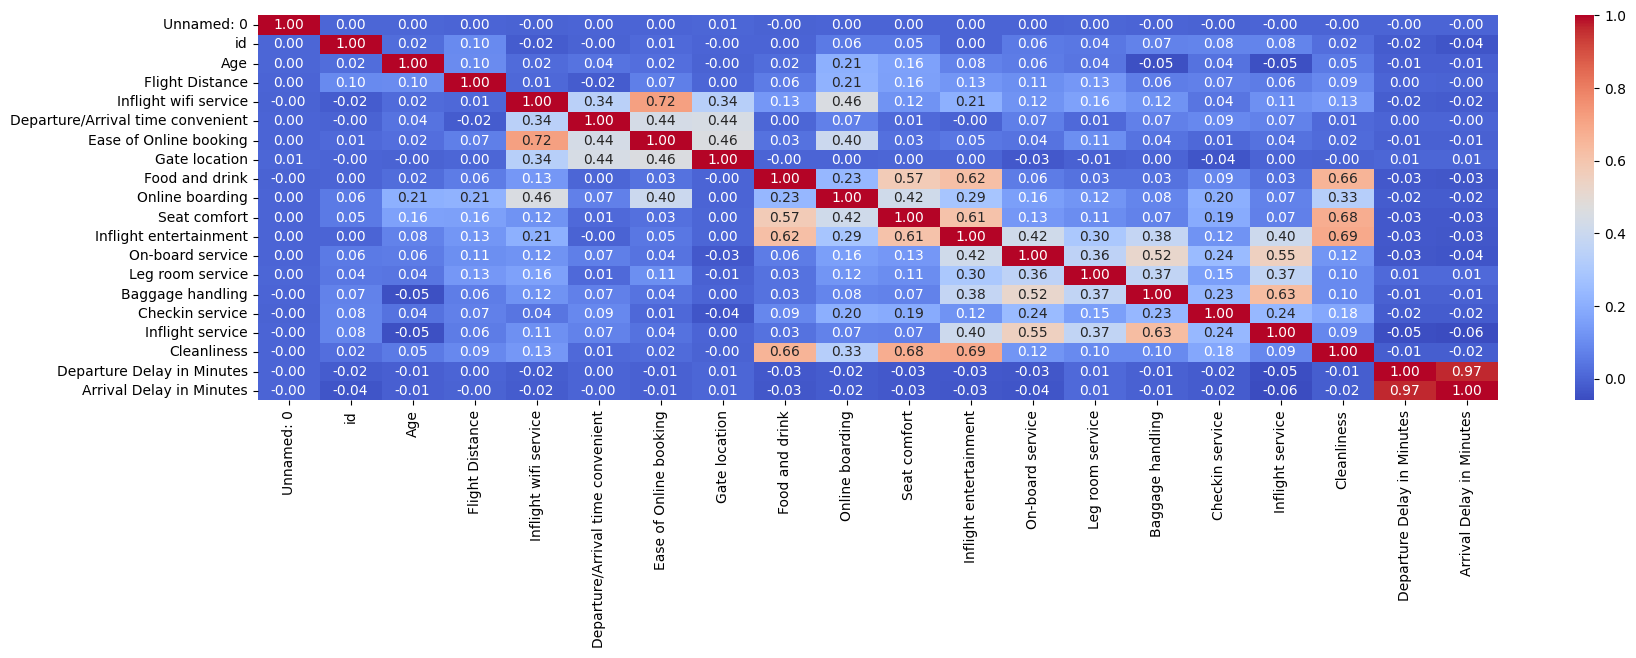

In [20]:
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm', fmt=".2f")

# Data preprocessing

Drop first two columns

In [21]:
df = df.drop(df.columns[:2], axis=1)
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Rename columns

In [22]:
df = df.rename(columns = str.lower)
df.columns

Index(['gender', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction'],
      dtype='object')

In [23]:
df = df.rename(columns = {
    'unnamed: 0' : 'number',
    'customer type' : 'customer_type',
    'type of travel' : 'travel_type',
    'flight distance' : 'distance',
    'inflight wifi service' : 'wifi',
    'departure/arrival time convenient' : 'convenientt_time',
    'ease of online booking' : 'online_booking',
    'gate location' : 'gate_location',
    'food and drink' : 'food_drink',
    'online boarding' : 'online_boarding',
    'seat comfort' : 'seat_comfort',
    'inflight entertainment' : 'entertainment',
    'on-board service' : 'on_board_service',
    'leg room service' : 'leg_room',
    'baggage handling' : 'baggage_handling',
    'checkin service' : 'checkin',
    'inflight service' : 'inflight_service',
    'departure delay in minutes' : 'departure_delay',
    'arrival delay in minutes' : 'arrival_delay',
})

Finding and cleaning null values

In [24]:
df.isna().sum()

gender                0
customer_type         0
age                   0
travel_type           0
class                 0
distance              0
wifi                  0
convenientt_time      0
online_booking        0
gate_location         0
food_drink            0
online_boarding       0
seat_comfort          0
entertainment         0
on_board_service      0
leg_room              0
baggage_handling      0
checkin               0
inflight_service      0
cleanliness           0
departure_delay       0
arrival_delay       310
satisfaction          0
dtype: int64

In [25]:
df['arrival_delay'].fillna(df['arrival_delay'].mean(), inplace=True)

In [26]:
df.isnull().sum()

gender              0
customer_type       0
age                 0
travel_type         0
class               0
distance            0
wifi                0
convenientt_time    0
online_booking      0
gate_location       0
food_drink          0
online_boarding     0
seat_comfort        0
entertainment       0
on_board_service    0
leg_room            0
baggage_handling    0
checkin             0
inflight_service    0
cleanliness         0
departure_delay     0
arrival_delay       0
satisfaction        0
dtype: int64

Delete duplicate data

In [27]:
df.duplicated().sum()

0

Data encoding - converting categorical variabels into nemurical

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
X_num = df.select_dtypes(exclude='object')
X_cat = df.select_dtypes(include='object')

enc = OneHotEncoder(sparse_output=False)
X_cat_encoded = enc.fit_transform(X_cat)

In [30]:
encoded_columns = enc.get_feature_names_out(input_features=X_cat.columns)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoded_columns, index = X_cat.index)
df_encoded = pd.concat([X_num, X_cat_encoded_df], axis=1)

In [31]:
df_encoded.head()

,age,distance,wifi,convenientt_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertainment,...,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,travel_type_Business travel,travel_type_Personal Travel,class_Business,class_Eco,class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,25,235,3,2,3,3,1,3,1,1,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,25,562,2,5,5,5,2,2,2,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,61,214,3,3,3,3,4,5,5,3,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
df_encoded.describe().loc[['min', 'max']]

,age,distance,wifi,convenientt_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertainment,...,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,travel_type_Business travel,travel_type_Personal Travel,class_Business,class_Eco,class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
min,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Data scaling - getting numerical data to interval from 0 to 1

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
df_encoded[X_num.columns] = scaler.fit_transform(df_encoded[X_num.columns])

In [35]:
df_encoded.describe().loc[['min', 'max']]

,age,distance,wifi,convenientt_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertainment,...,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,travel_type_Business travel,travel_type_Personal Travel,class_Business,class_Eco,class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [36]:
df_encoded.drop(columns=['satisfaction_neutral or dissatisfied'], inplace=True)

In [37]:
df_encoded = df_encoded.rename(columns = {
    'satisfaction_satisfied' : 'satisfaction',
})

In [38]:
df_encoded.head()

,age,distance,wifi,convenientt_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertainment,...,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,travel_type_Business travel,travel_type_Personal Travel,class_Business,class_Eco,class_Eco Plus,satisfaction
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Model building
In this project, I built a simple Multi-Layer Perceptron (MLP) model to predict passenger satisfaction (satisfied vs. dissatisfied) based on the available features.
The task is treated as a binary classification problem.
* Loss function: `BCEWithLogitsLoss`
* Optimizer: Adam
* Metrics: Accuracy and F1 

In [39]:
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 7.5 MB/s eta 0:00:00


In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as tnf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torcheval.metrics.functional import binary_f1_score, binary_accuracy, binary_confusion_matrix, binary_recall, binary_precision

Model parameters

In [41]:
class Parameters():
  lr = 0.001
  batch_size_train = 32
  batch_size_val = 128
  epochs = 100
  input_dim = 27
  hidden_dim = 256
  output_dim = 1

params = Parameters()

Create the model - Multi-Layer Perceptron (MLP) for binary classification

In [42]:
class MLP(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.BatchNorm1d(hidden_dim),
        nn.ReLU(),
        nn.Dropout(0.3),

        nn.Linear(hidden_dim, hidden_dim),
        nn.BatchNorm1d(hidden_dim),
        nn.ReLU(),

        nn.Linear(hidden_dim, output_dim)
        # nn.Sigmoid()
    )

  def forward(self, x):
    return self.model(x)

In [43]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

model = MLP(input_dim=params.input_dim, hidden_dim=params.hidden_dim, output_dim=params.output_dim).to(device)

Split data for train and validation dataset before training

In [44]:
X = df_encoded.drop(columns=['satisfaction'])
Y = df_encoded['satisfaction']

print(f"X: {X.shape}")
print(f"Y: {Y.shape}")

X: (103904, 27)
Y: (103904,)


In [45]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 42, stratify = Y)

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_valid:', x_val.shape)
print('y_valid:', y_val.shape)

x_train: (83123, 27)
y_train: (83123,)
x_valid: (20781, 27)
y_valid: (20781,)


Convert to tensors

In [46]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

Create DataLoader

In [47]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=params.batch_size_train, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=params.batch_size_val, shuffle=False)

Loss function and optimizer

In [48]:
import torch.nn as nn
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=params.lr)

*Training* and *validation* loop with metrics



In [49]:
epochs = params.epochs

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
  with tqdm(total=len(train_dataloader), position=0, leave=True) as progress_bar:

    model.train()

    total_loss = 0
    total_acc = 0
    total_f1 = 0

    for x,y in train_dataloader:
      x, y = x.to(device), y.to(device)

      # Clear gradient from the optimizer
      optimizer.zero_grad()

      # Forward pass
      y_logits = model(x).squeeze()

      # Calulate loss
      loss = loss_fn(y_logits, y)

      # Backward pass
      loss.backward()

      # One step of the optimizer - update model parametres
      optimizer.step()

      # Calculate metrics
      y_pred = torch.round(torch.sigmoid(y_logits))

      acc = binary_accuracy(y_pred, y).item()
      f1 = binary_f1_score(y_pred, y).item()

      total_loss += loss.item()
      total_acc += acc
      total_f1 += f1

      # Update progress bar
      progress_bar.set_postfix_str(f"Epoch: {epoch}, Avg. train loss: {total_loss / len(train_dataloader)}, Avg. train acc: {total_acc / len(train_dataloader)}")
      progress_bar.update(1)

  # Average metrics
  avg_loss = total_loss / len(train_dataloader)
  avg_acc = total_acc / len(train_dataloader)
  avg_f1 = total_f1 / len(train_dataloader)

  train_losses.append(avg_loss)
  train_accuracies.append(avg_acc)

  # ------------------------------------------------------------------------------------------------------------------------------------------------
  # Validation loop
  model.eval()

  total_val_f1 = 0
  total_val_loss = 0
  total_val_acc = 0

  with torch.inference_mode():
    for x,y in val_dataloader:
      x, y = x.to(device), y.to(device)

      # Forward pass
      val_logits = model(x).squeeze()
      val_pred = torch.round(torch.sigmoid(val_logits))

      # Calculate loss
      val_loss = loss_fn(val_logits, y)

      # Calculate metrics
      val_acc = binary_accuracy(val_pred, y).item()
      val_f1 = binary_f1_score(val_pred, y).item()

      total_val_loss += val_loss.item()
      total_val_acc += val_acc
      total_val_f1 += val_f1

  avg_val_acc = total_val_acc / len(val_dataloader)
  avg_val_f1 = total_val_f1 / len(val_dataloader)
  avg_val_loss = total_val_loss / len(val_dataloader)

  val_losses.append(avg_val_loss)
  val_accuracies.append(avg_val_acc)

  print(f"Avg val loss: {avg_val_loss}, Avg val accuracy: {avg_val_acc}, Avg val F1 score: {avg_val_f1}")

100%|██████████| 2598/2598 [00:10<00:00, 252.22it/s, Epoch: 0, Avg. train loss: 0.21176296974847048, Avg. train acc: 0.9145331935436566]


Avg val loss: 0.14027204963327186, Avg val accuracy: 0.9454637440435726, Avg val F1 score: 0.9364511849690069


100%|██████████| 2598/2598 [00:09<00:00, 271.68it/s, Epoch: 1, Avg. train loss: 0.16566152639222476, Avg. train acc: 0.9325081793687452]


Avg val loss: 0.11993272936234445, Avg val accuracy: 0.950783912755229, Avg val F1 score: 0.9416124052796627


100%|██████████| 2598/2598 [00:09<00:00, 277.08it/s, Epoch: 2, Avg. train loss: 0.1501479364922263, Avg. train acc: 0.9387142437526682]


Avg val loss: 0.11075278117887082, Avg val accuracy: 0.9538513974178057, Avg val F1 score: 0.9460131540620254


100%|██████████| 2598/2598 [00:09<00:00, 277.00it/s, Epoch: 3, Avg. train loss: 0.14502806004618593, Avg. train acc: 0.9405311778290993]


Avg val loss: 0.10540987654057749, Avg val accuracy: 0.9558239604797831, Avg val F1 score: 0.9482247712422003


100%|██████████| 2598/2598 [00:09<00:00, 275.66it/s, Epoch: 4, Avg. train loss: 0.13739183735642999, Avg. train acc: 0.9442156922413442]


Avg val loss: 0.10104528528872443, Avg val accuracy: 0.9572139144675132, Avg val F1 score: 0.9498083829148415


100%|██████████| 2598/2598 [00:09<00:00, 273.09it/s, Epoch: 5, Avg. train loss: 0.13220771774721315, Avg. train acc: 0.9449848821064066]


Avg val loss: 0.10064819480286785, Avg val accuracy: 0.9579328561853047, Avg val F1 score: 0.9499669338296528


100%|██████████| 2598/2598 [00:09<00:00, 276.55it/s, Epoch: 6, Avg. train loss: 0.1283275900771404, Avg. train acc: 0.948149006329104]


Avg val loss: 0.09793530157738668, Avg val accuracy: 0.9586922716509345, Avg val F1 score: 0.9511654157580042


100%|██████████| 2598/2598 [00:09<00:00, 277.91it/s, Epoch: 7, Avg. train loss: 0.12550146816770838, Avg. train acc: 0.9487384020180956]


Avg val loss: 0.09783399964402789, Avg val accuracy: 0.9588360599944928, Avg val F1 score: 0.9509354358070468


100%|██████████| 2598/2598 [00:09<00:00, 270.59it/s, Epoch: 8, Avg. train loss: 0.12170504045574491, Avg. train acc: 0.9500457082371054]


Avg val loss: 0.09595694692314037, Avg val accuracy: 0.9597541752037095, Avg val F1 score: 0.9530483608596896


100%|██████████| 2598/2598 [00:09<00:00, 276.08it/s, Epoch: 9, Avg. train loss: 0.11871480672484733, Avg. train acc: 0.9508630120359631]


Avg val loss: 0.09356515191815382, Avg val accuracy: 0.9608011673564559, Avg val F1 score: 0.9537514755330934


100%|██████████| 2598/2598 [00:09<00:00, 280.83it/s, Epoch: 10, Avg. train loss: 0.1173534420567326, Avg. train acc: 0.9509396144892271]


Avg val loss: 0.0933761600793505, Avg val accuracy: 0.9605061349693251, Avg val F1 score: 0.9534926494937733


100%|██████████| 2598/2598 [00:09<00:00, 274.55it/s, Epoch: 11, Avg. train loss: 0.11510559430150881, Avg. train acc: 0.9524672318872256]


Avg val loss: 0.0893879317524243, Avg val accuracy: 0.9623828391355971, Avg val F1 score: 0.955599669664184


100%|██████████| 2598/2598 [00:09<00:00, 277.10it/s, Epoch: 12, Avg. train loss: 0.11289609993719786, Avg. train acc: 0.9533212542120909]


Avg val loss: 0.08914425845709315, Avg val accuracy: 0.9619919478527608, Avg val F1 score: 0.9549772019035245


100%|██████████| 2598/2598 [00:09<00:00, 277.64it/s, Epoch: 13, Avg. train loss: 0.1109441982358522, Avg. train acc: 0.9531889408941541]


Avg val loss: 0.0886285434151354, Avg val accuracy: 0.9620878067484663, Avg val F1 score: 0.9553234277327368


100%|██████████| 2598/2598 [00:09<00:00, 274.58it/s, Epoch: 14, Avg. train loss: 0.11190510773314329, Avg. train acc: 0.9542316204772903]


Avg val loss: 0.08839910359698937, Avg val accuracy: 0.9623753834355828, Avg val F1 score: 0.955347120030526


100%|██████████| 2598/2598 [00:09<00:00, 275.80it/s, Epoch: 15, Avg. train loss: 0.10995233676047154, Avg. train acc: 0.9549849833819938]


Avg val loss: 0.0873597334453299, Avg val accuracy: 0.9620398773006135, Avg val F1 score: 0.955331031895854


100%|██████████| 2598/2598 [00:09<00:00, 276.56it/s, Epoch: 16, Avg. train loss: 0.10844313075444773, Avg. train acc: 0.9552337830804513]


Avg val loss: 0.08936050657662878, Avg val accuracy: 0.961807685761364, Avg val F1 score: 0.9548895633293807


100%|██████████| 2598/2598 [00:09<00:00, 277.55it/s, Epoch: 17, Avg. train loss: 0.1069181603582087, Avg. train acc: 0.955782661766525]


Avg val loss: 0.09070983419389081, Avg val accuracy: 0.9612730061349694, Avg val F1 score: 0.9547268682462307


100%|██████████| 2598/2598 [00:09<00:00, 275.79it/s, Epoch: 18, Avg. train loss: 0.10835960678780614, Avg. train acc: 0.9556224930047805]


Avg val loss: 0.08721539728983414, Avg val accuracy: 0.9628067484662577, Avg val F1 score: 0.9562449879441525


100%|██████████| 2598/2598 [00:09<00:00, 273.96it/s, Epoch: 19, Avg. train loss: 0.10584354804261653, Avg. train acc: 0.9558953496701356]


Avg val loss: 0.08470121597402666, Avg val accuracy: 0.9636843899276359, Avg val F1 score: 0.957019734602033


100%|██████████| 2598/2598 [00:09<00:00, 275.21it/s, Epoch: 20, Avg. train loss: 0.10572639413664062, Avg. train acc: 0.9563283750742926]


Avg val loss: 0.08835011215571976, Avg val accuracy: 0.961807685761364, Avg val F1 score: 0.9551448390527737


100%|██████████| 2598/2598 [00:09<00:00, 274.07it/s, Epoch: 21, Avg. train loss: 0.10523410624027033, Avg. train acc: 0.9561593432303481]


Avg val loss: 0.08509653915245474, Avg val accuracy: 0.9638132668711656, Avg val F1 score: 0.9571615819550731


100%|██████████| 2598/2598 [00:09<00:00, 273.44it/s, Epoch: 22, Avg. train loss: 0.10497368580885404, Avg. train acc: 0.9567493719950009]


Avg val loss: 0.0850565224611686, Avg val accuracy: 0.9633339723926381, Avg val F1 score: 0.9566248223825466


100%|██████████| 2598/2598 [00:09<00:00, 278.26it/s, Epoch: 23, Avg. train loss: 0.10388694275136509, Avg. train acc: 0.9567493719950009]


Avg val loss: 0.08503369358511059, Avg val accuracy: 0.9632455691969468, Avg val F1 score: 0.956825121414442


100%|██████████| 2598/2598 [00:09<00:00, 274.32it/s, Epoch: 24, Avg. train loss: 0.10249060544535214, Avg. train acc: 0.9572906537501972]


Avg val loss: 0.08434744032979744, Avg val accuracy: 0.9638686520190327, Avg val F1 score: 0.9572896116350326


100%|██████████| 2598/2598 [00:09<00:00, 276.59it/s, Epoch: 25, Avg. train loss: 0.10318289845884333, Avg. train acc: 0.957046285604311]


Avg val loss: 0.08460853169986442, Avg val accuracy: 0.9637727931233272, Avg val F1 score: 0.9571603573173102


100%|██████████| 2598/2598 [00:09<00:00, 272.60it/s, Epoch: 26, Avg. train loss: 0.10064484472737846, Avg. train acc: 0.9582491339491916]


Avg val loss: 0.08302508724247751, Avg val accuracy: 0.9643000170497075, Avg val F1 score: 0.9579483899602129


100%|██████████| 2598/2598 [00:09<00:00, 281.58it/s, Epoch: 27, Avg. train loss: 0.10105773217415435, Avg. train acc: 0.958468812052519]


Avg val loss: 0.08479787247038327, Avg val accuracy: 0.9639645109147382, Avg val F1 score: 0.957452839503259


100%|██████████| 2598/2598 [00:09<00:00, 274.18it/s, Epoch: 28, Avg. train loss: 0.09912751298418392, Avg. train acc: 0.9586941878367975]


Avg val loss: 0.0838905724759665, Avg val accuracy: 0.9641082992582964, Avg val F1 score: 0.9575686326787516


100%|██████████| 2598/2598 [00:09<00:00, 271.86it/s, Epoch: 29, Avg. train loss: 0.09937281188593777, Avg. train acc: 0.9576116243264049]


Avg val loss: 0.0845368905621438, Avg val accuracy: 0.9639091257668712, Avg val F1 score: 0.9576438098597381


100%|██████████| 2598/2598 [00:09<00:00, 281.13it/s, Epoch: 30, Avg. train loss: 0.09855819600107316, Avg. train acc: 0.9586581023864511]


Avg val loss: 0.08414376799611409, Avg val accuracy: 0.9629505368098159, Avg val F1 score: 0.9564315804674581


100%|██████████| 2598/2598 [00:09<00:00, 275.53it/s, Epoch: 31, Avg. train loss: 0.099161182567954, Avg. train acc: 0.9585859314857583]


Avg val loss: 0.08336126728646137, Avg val accuracy: 0.9640529141104295, Avg val F1 score: 0.9574900412120702


100%|██████████| 2598/2598 [00:09<00:00, 278.68it/s, Epoch: 32, Avg. train loss: 0.09885220291050692, Avg. train acc: 0.9592956120092379]


Avg val loss: 0.08468587265744165, Avg val accuracy: 0.9637174079754601, Avg val F1 score: 0.957327478136753


100%|██████████| 2598/2598 [00:09<00:00, 271.01it/s, Epoch: 33, Avg. train loss: 0.09919569576897581, Avg. train acc: 0.9583852457440386]


Avg val loss: 0.08288528351970245, Avg val accuracy: 0.964532208588957, Avg val F1 score: 0.9580939671744598


100%|██████████| 2598/2598 [00:09<00:00, 273.40it/s, Epoch: 34, Avg. train loss: 0.09807170225143164, Avg. train acc: 0.9586897562842263]


Avg val loss: 0.08525511120771703, Avg val accuracy: 0.9630463957055214, Avg val F1 score: 0.9565763784332509


100%|██████████| 2598/2598 [00:09<00:00, 280.56it/s, Epoch: 35, Avg. train loss: 0.09801812212985207, Avg. train acc: 0.9592626919601402]


Avg val loss: 0.08294126228572218, Avg val accuracy: 0.9632381134969326, Avg val F1 score: 0.9565138787579682


100%|██████████| 2598/2598 [00:09<00:00, 276.89it/s, Epoch: 36, Avg. train loss: 0.09672916114221494, Avg. train acc: 0.9590189568899153]


Avg val loss: 0.08338821057138816, Avg val accuracy: 0.9641008435582822, Avg val F1 score: 0.9576824859607439


100%|██████████| 2598/2598 [00:09<00:00, 273.68it/s, Epoch: 37, Avg. train loss: 0.098405095676908, Avg. train acc: 0.9584333596778338]


Avg val loss: 0.08925172306048723, Avg val accuracy: 0.9615126533742331, Avg val F1 score: 0.9549442643036872


100%|██████████| 2598/2598 [00:09<00:00, 279.59it/s, Epoch: 38, Avg. train loss: 0.09902973679079674, Avg. train acc: 0.9590107268833765]


Avg val loss: 0.0869510280985408, Avg val accuracy: 0.9624307685834499, Avg val F1 score: 0.955891367847934


100%|██████████| 2598/2598 [00:09<00:00, 279.90it/s, Epoch: 39, Avg. train loss: 0.09736364668886177, Avg. train acc: 0.959167097168211]


Avg val loss: 0.08243697603444564, Avg val accuracy: 0.9645801380368099, Avg val F1 score: 0.9580803506213463


100%|██████████| 2598/2598 [00:09<00:00, 269.15it/s, Epoch: 40, Avg. train loss: 0.09657375534922544, Avg. train acc: 0.9599451501154734]


Avg val loss: 0.08384391815155927, Avg val accuracy: 0.9642446319018405, Avg val F1 score: 0.9575810571389696


100%|██████████| 2598/2598 [00:09<00:00, 275.69it/s, Epoch: 41, Avg. train loss: 0.09697008735632553, Avg. train acc: 0.9590708693006206]


Avg val loss: 0.0824565615539262, Avg val accuracy: 0.9640529141104295, Avg val F1 score: 0.9574937345060103


100%|██████████| 2598/2598 [00:09<00:00, 278.81it/s, Epoch: 42, Avg. train loss: 0.09507496376737688, Avg. train acc: 0.9603053715432764]


Avg val loss: 0.0842019900182502, Avg val accuracy: 0.9632381134969326, Avg val F1 score: 0.9567546380078135


100%|██████████| 2598/2598 [00:09<00:00, 280.24it/s, Epoch: 43, Avg. train loss: 0.0951654142626648, Avg. train acc: 0.9595279516716753]


Avg val loss: 0.08222020847402925, Avg val accuracy: 0.9636215490797546, Avg val F1 score: 0.957280000660317


100%|██████████| 2598/2598 [00:09<00:00, 269.27it/s, Epoch: 44, Avg. train loss: 0.09665453293593063, Avg. train acc: 0.9598609507313318]


Avg val loss: 0.08251010741398561, Avg val accuracy: 0.9646759969325154, Avg val F1 score: 0.9581725111036944


100%|██████████| 2598/2598 [00:09<00:00, 280.83it/s, Epoch: 45, Avg. train loss: 0.09443593979221672, Avg. train acc: 0.9604984603541186]


Avg val loss: 0.08112000854560203, Avg val accuracy: 0.9650594325153374, Avg val F1 score: 0.9588162109164372


100%|██████████| 2598/2598 [00:09<00:00, 280.00it/s, Epoch: 46, Avg. train loss: 0.09662680617357791, Avg. train acc: 0.9596760919270284]


Avg val loss: 0.0823384370723385, Avg val accuracy: 0.9644363496932515, Avg val F1 score: 0.9580743108059


100%|██████████| 2598/2598 [00:09<00:00, 271.56it/s, Epoch: 47, Avg. train loss: 0.09462740854602135, Avg. train acc: 0.9598843746225681]


Avg val loss: 0.08198961600706987, Avg val accuracy: 0.9649156441717791, Avg val F1 score: 0.9585905524850623


100%|██████████| 2598/2598 [00:09<00:00, 270.83it/s, Epoch: 48, Avg. train loss: 0.09458209240274594, Avg. train acc: 0.9601255773672055]


Avg val loss: 0.08128017773337524, Avg val accuracy: 0.9648677147239264, Avg val F1 score: 0.9583697801718682


100%|██████████| 2598/2598 [00:09<00:00, 278.48it/s, Epoch: 49, Avg. train loss: 0.09421019273277034, Avg. train acc: 0.9602496606786036]


Avg val loss: 0.0815847443725251, Avg val accuracy: 0.9641008435582822, Avg val F1 score: 0.9577768481582221


100%|██████████| 2598/2598 [00:09<00:00, 278.25it/s, Epoch: 50, Avg. train loss: 0.09362999204972083, Avg. train acc: 0.9604262894534257]


Avg val loss: 0.0824629912050041, Avg val accuracy: 0.964148773006135, Avg val F1 score: 0.9577005728622155


100%|██████████| 2598/2598 [00:09<00:00, 264.55it/s, Epoch: 51, Avg. train loss: 0.09279998827254611, Avg. train acc: 0.9609314857582756]


Avg val loss: 0.08176723584829847, Avg val accuracy: 0.9650115030674846, Avg val F1 score: 0.9586299851628169


100%|██████████| 2598/2598 [00:09<00:00, 272.11it/s, Epoch: 52, Avg. train loss: 0.0943289208464293, Avg. train acc: 0.9603541185527329]


Avg val loss: 0.08332109852962516, Avg val accuracy: 0.9640049846625767, Avg val F1 score: 0.9575433449511148


100%|██████████| 2598/2598 [00:09<00:00, 277.07it/s, Epoch: 53, Avg. train loss: 0.09222546997881588, Avg. train acc: 0.9611961123941494]


Avg val loss: 0.08247838980958232, Avg val accuracy: 0.9648197852760736, Avg val F1 score: 0.9583785508307943


100%|██████████| 2598/2598 [00:09<00:00, 275.71it/s, Epoch: 54, Avg. train loss: 0.09257476620694796, Avg. train acc: 0.9610074551358785]


Avg val loss: 0.0815857632679899, Avg val accuracy: 0.9648677147239264, Avg val F1 score: 0.9585490018312185


100%|██████████| 2598/2598 [00:09<00:00, 268.56it/s, Epoch: 55, Avg. train loss: 0.09315802983106548, Avg. train acc: 0.9606307736720554]


Avg val loss: 0.08316554037134158, Avg val accuracy: 0.964532208588957, Avg val F1 score: 0.9580332662430278


100%|██████████| 2598/2598 [00:09<00:00, 279.43it/s, Epoch: 56, Avg. train loss: 0.09183810202202676, Avg. train acc: 0.9610270805502048]


Avg val loss: 0.08382311720183931, Avg val accuracy: 0.9629026073619632, Avg val F1 score: 0.9564460102765838


100%|██████████| 2598/2598 [00:09<00:00, 272.49it/s, Epoch: 57, Avg. train loss: 0.09324853045125997, Avg. train acc: 0.9604744033872209]


Avg val loss: 0.08184468068548141, Avg val accuracy: 0.9641008435582822, Avg val F1 score: 0.9575991129582645


100%|██████████| 2598/2598 [00:09<00:00, 277.80it/s, Epoch: 58, Avg. train loss: 0.09332264175975884, Avg. train acc: 0.9605864582151702]


Avg val loss: 0.0831304184829622, Avg val accuracy: 0.9646759969325154, Avg val F1 score: 0.9581890917994493


100%|██████████| 2598/2598 [00:09<00:00, 264.15it/s, Epoch: 59, Avg. train loss: 0.09200372533389944, Avg. train acc: 0.9608713433410315]


Avg val loss: 0.08174769980033025, Avg val accuracy: 0.9652032208588958, Avg val F1 score: 0.9590114724416674


100%|██████████| 2598/2598 [00:09<00:00, 276.90it/s, Epoch: 60, Avg. train loss: 0.09199423619310836, Avg. train acc: 0.9607187715331071]


Avg val loss: 0.08159544943129084, Avg val accuracy: 0.9654907975460123, Avg val F1 score: 0.9592268558367629


100%|██████████| 2598/2598 [00:09<00:00, 279.22it/s, Epoch: 61, Avg. train loss: 0.09249016536721276, Avg. train acc: 0.9610397421093149]


Avg val loss: 0.08189749017792063, Avg val accuracy: 0.9646759969325154, Avg val F1 score: 0.9582880311217045


100%|██████████| 2598/2598 [00:09<00:00, 277.15it/s, Epoch: 62, Avg. train loss: 0.09275631424481603, Avg. train acc: 0.9605706312548113]


Avg val loss: 0.08316513394331274, Avg val accuracy: 0.9639091257668712, Avg val F1 score: 0.9575014472739097


100%|██████████| 2598/2598 [00:09<00:00, 278.51it/s, Epoch: 63, Avg. train loss: 0.0919411958744097, Avg. train acc: 0.960907428791378]


Avg val loss: 0.08086484450092711, Avg val accuracy: 0.9650115030674846, Avg val F1 score: 0.9585600535562433


100%|██████████| 2598/2598 [00:09<00:00, 275.66it/s, Epoch: 64, Avg. train loss: 0.09231488046048494, Avg. train acc: 0.9609194572748267]


Avg val loss: 0.0822823556722856, Avg val accuracy: 0.9636694785276073, Avg val F1 score: 0.9572715338753777


100%|██████████| 2598/2598 [00:09<00:00, 279.12it/s, Epoch: 65, Avg. train loss: 0.09072206948524997, Avg. train acc: 0.9611157114869178]


Avg val loss: 0.08156573094793258, Avg val accuracy: 0.9640529141104295, Avg val F1 score: 0.9577047762695265


100%|██████████| 2598/2598 [00:09<00:00, 269.67it/s, Epoch: 66, Avg. train loss: 0.09089865862580807, Avg. train acc: 0.9616329362752164]


Avg val loss: 0.08159047946265321, Avg val accuracy: 0.9650594325153374, Avg val F1 score: 0.9588821844820596


100%|██████████| 2598/2598 [00:09<00:00, 271.07it/s, Epoch: 67, Avg. train loss: 0.09179069607423976, Avg. train acc: 0.9616487632126327]


Avg val loss: 0.0836701528369192, Avg val accuracy: 0.963957055214724, Avg val F1 score: 0.9576428400958242


100%|██████████| 2598/2598 [00:09<00:00, 281.49it/s, Epoch: 68, Avg. train loss: 0.09085913605305486, Avg. train acc: 0.961717135659358]


Avg val loss: 0.08151284337580844, Avg val accuracy: 0.9656345858895705, Avg val F1 score: 0.9594045943277745


100%|██████████| 2598/2598 [00:09<00:00, 281.35it/s, Epoch: 69, Avg. train loss: 0.09249450719628191, Avg. train acc: 0.9606345721489654]


Avg val loss: 0.08225208899703311, Avg val accuracy: 0.9646280674846626, Avg val F1 score: 0.9583265755805501


100%|██████████| 2598/2598 [00:09<00:00, 275.54it/s, Epoch: 70, Avg. train loss: 0.09191772588485675, Avg. train acc: 0.9614164235731378]


Avg val loss: 0.08216884584834605, Avg val accuracy: 0.9652511503067485, Avg val F1 score: 0.9589483500258323


100%|██████████| 2598/2598 [00:09<00:00, 280.46it/s, Epoch: 71, Avg. train loss: 0.09037189226700788, Avg. train acc: 0.9618652759147113]


Avg val loss: 0.08286693803623227, Avg val accuracy: 0.9641967024539877, Avg val F1 score: 0.9578348416492252


100%|██████████| 2598/2598 [00:09<00:00, 277.61it/s, Epoch: 72, Avg. train loss: 0.09097779645735801, Avg. train acc: 0.9619817622952318]


Avg val loss: 0.08301768137679144, Avg val accuracy: 0.9645801380368099, Avg val F1 score: 0.9582157098442499


100%|██████████| 2598/2598 [00:09<00:00, 273.44it/s, Epoch: 73, Avg. train loss: 0.09017985208707255, Avg. train acc: 0.9615689953810623]


Avg val loss: 0.08260704800372291, Avg val accuracy: 0.9648197852760736, Avg val F1 score: 0.9583513466127079


100%|██████████| 2598/2598 [00:09<00:00, 265.09it/s, Epoch: 74, Avg. train loss: 0.0916176966305559, Avg. train acc: 0.9612081408775982]


Avg val loss: 0.0826831193972219, Avg val accuracy: 0.9646280674846626, Avg val F1 score: 0.9581746619903236


100%|██████████| 2598/2598 [00:09<00:00, 278.73it/s, Epoch: 75, Avg. train loss: 0.09025602875367199, Avg. train acc: 0.9615569668976135]


Avg val loss: 0.08169123128147944, Avg val accuracy: 0.964340490797546, Avg val F1 score: 0.9579676795590875


100%|██████████| 2598/2598 [00:09<00:00, 279.75it/s, Epoch: 76, Avg. train loss: 0.09023386903725181, Avg. train acc: 0.9613284257120862]


Avg val loss: 0.08129984442933114, Avg val accuracy: 0.964532208588957, Avg val F1 score: 0.95814339332054


100%|██████████| 2598/2598 [00:09<00:00, 275.21it/s, Epoch: 77, Avg. train loss: 0.08974257259949786, Avg. train acc: 0.9618931313585188]


Avg val loss: 0.0809128562851232, Avg val accuracy: 0.9650594325153374, Avg val F1 score: 0.9588812183748725


100%|██████████| 2598/2598 [00:09<00:00, 278.10it/s, Epoch: 78, Avg. train loss: 0.08919950499466127, Avg. train acc: 0.9620336746829945]


Avg val loss: 0.08162802406958093, Avg val accuracy: 0.9652032208588958, Avg val F1 score: 0.9589082441446971


100%|██████████| 2598/2598 [00:09<00:00, 278.18it/s, Epoch: 79, Avg. train loss: 0.08957560994702495, Avg. train acc: 0.9620982486528099]


Avg val loss: 0.0818230277413011, Avg val accuracy: 0.9646759969325154, Avg val F1 score: 0.9583139821795598


100%|██████████| 2598/2598 [00:09<00:00, 265.63it/s, Epoch: 80, Avg. train loss: 0.09014686142778049, Avg. train acc: 0.9619817622952318]


Avg val loss: 0.08130032625163626, Avg val accuracy: 0.9649635736196319, Avg val F1 score: 0.9585235857524754


100%|██████████| 2598/2598 [00:09<00:00, 266.73it/s, Epoch: 81, Avg. train loss: 0.08780066315618826, Avg. train acc: 0.9626756158583526]


Avg val loss: 0.081956167048289, Avg val accuracy: 0.9652032208588958, Avg val F1 score: 0.9588200449943542


100%|██████████| 2598/2598 [00:09<00:00, 277.63it/s, Epoch: 82, Avg. train loss: 0.08857554971119296, Avg. train acc: 0.9626673858518138]


Avg val loss: 0.08136466845435782, Avg val accuracy: 0.9650115030674846, Avg val F1 score: 0.9587533590983759


100%|██████████| 2598/2598 [00:09<00:00, 275.61it/s, Epoch: 83, Avg. train loss: 0.08835820699332166, Avg. train acc: 0.9624065576699076]


Avg val loss: 0.08353771710128415, Avg val accuracy: 0.9635736196319018, Avg val F1 score: 0.9572636689876486


100%|██████████| 2598/2598 [00:09<00:00, 271.28it/s, Epoch: 84, Avg. train loss: 0.08876643994214763, Avg. train acc: 0.9617652495931532]


Avg val loss: 0.08169316877525278, Avg val accuracy: 0.9641967024539877, Avg val F1 score: 0.9576329040381074


100%|██████████| 2598/2598 [00:09<00:00, 278.46it/s, Epoch: 85, Avg. train loss: 0.08742432816210759, Avg. train acc: 0.962935810941655]


Avg val loss: 0.08162211209101362, Avg val accuracy: 0.9645801380368099, Avg val F1 score: 0.9581020083164145


100%|██████████| 2598/2598 [00:09<00:00, 278.02it/s, Epoch: 86, Avg. train loss: 0.08937882050108563, Avg. train acc: 0.9629560694545851]


Avg val loss: 0.08342350978244302, Avg val accuracy: 0.9647718558282209, Avg val F1 score: 0.9583671637839335


100%|██████████| 2598/2598 [00:09<00:00, 273.22it/s, Epoch: 87, Avg. train loss: 0.08838653818362201, Avg. train acc: 0.9622900713123295]


Avg val loss: 0.08177074940269527, Avg val accuracy: 0.9659700920245399, Avg val F1 score: 0.9596441084621874


100%|██████████| 2598/2598 [00:09<00:00, 262.00it/s, Epoch: 88, Avg. train loss: 0.08888011009412121, Avg. train acc: 0.9625711579842233]


Avg val loss: 0.08187311347231177, Avg val accuracy: 0.9641967024539877, Avg val F1 score: 0.9577967977962611


100%|██████████| 2598/2598 [00:09<00:00, 279.42it/s, Epoch: 89, Avg. train loss: 0.08817052800786195, Avg. train acc: 0.9618937644341802]


Avg val loss: 0.08174935713456087, Avg val accuracy: 0.9646280674846626, Avg val F1 score: 0.9582913342429085


100%|██████████| 2598/2598 [00:09<00:00, 274.15it/s, Epoch: 90, Avg. train loss: 0.08804612674981964, Avg. train acc: 0.9626072434345697]


Avg val loss: 0.08178745379294354, Avg val accuracy: 0.965347009202454, Avg val F1 score: 0.959006469308233


100%|██████████| 2598/2598 [00:09<00:00, 279.34it/s, Epoch: 91, Avg. train loss: 0.08846904128595696, Avg. train acc: 0.9621742180304127]


Avg val loss: 0.08225584491241746, Avg val accuracy: 0.9638132668711656, Avg val F1 score: 0.9574242515797995


100%|██████████| 2598/2598 [00:09<00:00, 276.18it/s, Epoch: 92, Avg. train loss: 0.08736224641790973, Avg. train acc: 0.9630364703618168]


Avg val loss: 0.08220155626832525, Avg val accuracy: 0.9645801380368099, Avg val F1 score: 0.9581145315082527


100%|██████████| 2598/2598 [00:09<00:00, 275.68it/s, Epoch: 93, Avg. train loss: 0.08757072684801025, Avg. train acc: 0.9626034449576597]


Avg val loss: 0.08089946721469057, Avg val accuracy: 0.9646280674846626, Avg val F1 score: 0.9583063341357225


100%|██████████| 2598/2598 [00:09<00:00, 274.76it/s, Epoch: 94, Avg. train loss: 0.08706101836110419, Avg. train acc: 0.9625230440504281]


Avg val loss: 0.08003836586797164, Avg val accuracy: 0.9656825153374233, Avg val F1 score: 0.9594313527908793


100%|██████████| 2598/2598 [00:09<00:00, 271.58it/s, Epoch: 95, Avg. train loss: 0.08820897399734998, Avg. train acc: 0.9632650115473441]


Avg val loss: 0.08176791630228239, Avg val accuracy: 0.965347009202454, Avg val F1 score: 0.9590086823592157


100%|██████████| 2598/2598 [00:09<00:00, 263.26it/s, Epoch: 96, Avg. train loss: 0.08795772390379165, Avg. train acc: 0.961965935334873]


Avg val loss: 0.0831889543350946, Avg val accuracy: 0.9640529141104295, Avg val F1 score: 0.9576062914783969


100%|██████████| 2598/2598 [00:09<00:00, 274.05it/s, Epoch: 97, Avg. train loss: 0.08740040973253481, Avg. train acc: 0.9627395567525067]


Avg val loss: 0.08282534106765971, Avg val accuracy: 0.9642446319018405, Avg val F1 score: 0.9580037345184139


100%|██████████| 2598/2598 [00:09<00:00, 278.97it/s, Epoch: 98, Avg. train loss: 0.08671670397691604, Avg. train acc: 0.9629478394251039]


Avg val loss: 0.08196759401060687, Avg val accuracy: 0.9654428680981595, Avg val F1 score: 0.9591380046920542


100%|██████████| 2598/2598 [00:09<00:00, 277.86it/s, Epoch: 99, Avg. train loss: 0.0881732266378898, Avg. train acc: 0.962623070371986]


Avg val loss: 0.08243786864999704, Avg val accuracy: 0.9650115030674846, Avg val F1 score: 0.9587297000767995


# Visualisation of the Results

In [50]:
epochs_range = list(range(1, epochs + 1))

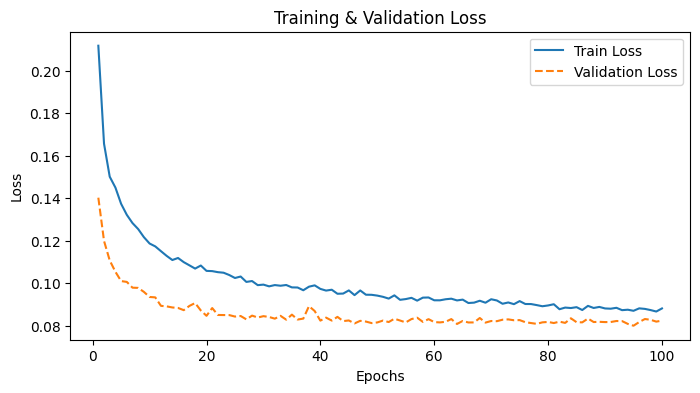

In [51]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=epochs_range, y=train_losses, label='Train Loss', palette="coolwarm")
sns.lineplot(x=epochs_range, y=val_losses, label='Validation Loss', palette="coolwarm", linestyle="dashed")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

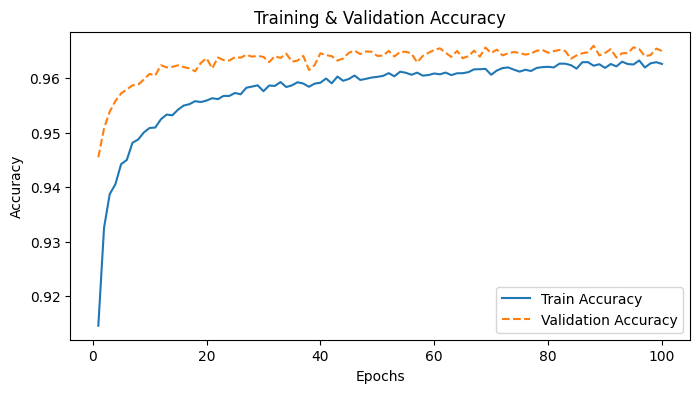

In [52]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=epochs_range, y=train_accuracies, label='Train Accuracy', palette="coolwarm")
sns.lineplot(x=epochs_range, y=val_accuracies, label='Validation Accuracy', palette="coolwarm", linestyle="dashed")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()